In [1]:
import torch
import matplotlib.pyplot as plt

import time

import os.path as osp
import numpy as np

from dataset import make_dataset
from train import make_data_loader, train_step, test_evaluations, save_model_GCN
from utils import get_device, plot_training_progress
from model import GCNNetwork, CEALNetwork

from args import *
from utils import *

/root/anaconda3/envs/material/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prepare the dataset

In [2]:
train_dataset, validation_dataset, test_dataset = make_dataset()
train_loader, val_loader, test_loader = make_data_loader(train_dataset, validation_dataset, test_dataset)

Model training parameters

In [3]:
model_name = "CEAL"
model_network = model_name + "Network"
model_args = args[model_name]

In [4]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

device = get_device()
# device = torch.device("cpu")

in_dim = train_dataset[0].x.shape[-1]
deg = generate_deg(train_dataset).float()
deg = deg.to(device)
model = CEALNetwork(deg, in_dim)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=model_args["learning_rate"])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode=model_args["sche_mode"], factor=model_args["sche_factor"], patience=model_args["sche_patience"], min_lr=model_args["sche_min_lr"]
)

29274 6273 6272


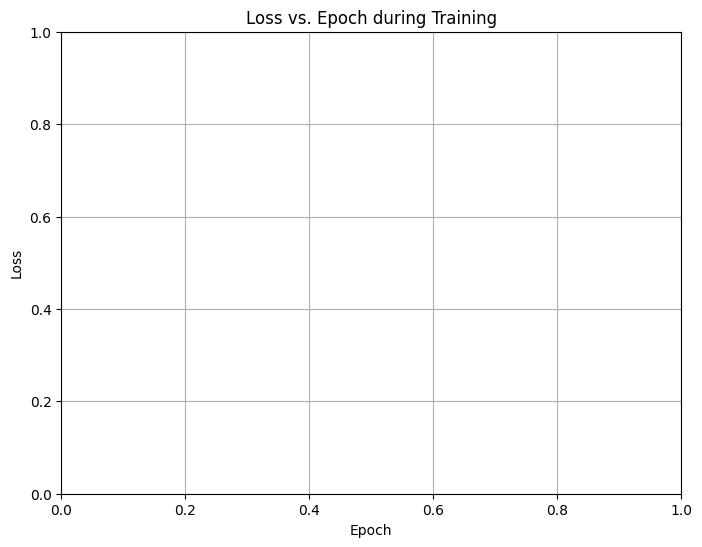

In [5]:
result_path = createResultFolder(osp.join("./results", model_name))
test_best_loss = None
epoch = None

train_losses = []
test_losses = []
val_losses = []

plt.figure(figsize=(8, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch during Training")
plt.grid(True)

Model training

Epoch 1, train loss(MAE)=0.1871, valid loss(MAE)=0.0977, test loss(MAE)=0.1001, lr=0.01, best_test=0.1001
Epoch 2, train loss(MAE)=0.0873, valid loss(MAE)=0.0871, test loss(MAE)=0.0899, lr=0.01, best_test=0.0899
Epoch 3, train loss(MAE)=0.082, valid loss(MAE)=0.0774, test loss(MAE)=0.0796, lr=0.01, best_test=0.0796
Epoch 4, train loss(MAE)=0.0725, valid loss(MAE)=0.0721, test loss(MAE)=0.0737, lr=0.01, best_test=0.0737
Epoch 5, train loss(MAE)=0.0684, valid loss(MAE)=0.0659, test loss(MAE)=0.0676, lr=0.01, best_test=0.0676
Epoch 6, train loss(MAE)=0.0675, valid loss(MAE)=0.0538, test loss(MAE)=0.0552, lr=0.01, best_test=0.0552
Epoch 7, train loss(MAE)=0.0494, valid loss(MAE)=0.0461, test loss(MAE)=0.0477, lr=0.01, best_test=0.0477
Epoch 8, train loss(MAE)=0.044, valid loss(MAE)=0.0474, test loss(MAE)=0.0484, lr=0.01, best_test=0.0477
Epoch 9, train loss(MAE)=0.0472, valid loss(MAE)=0.0386, test loss(MAE)=0.0408, lr=0.01, best_test=0.0408
Epoch 10, train loss(MAE)=0.0411, valid loss(MAE

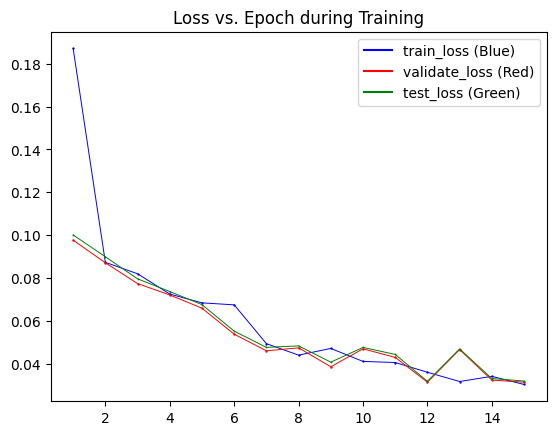

Epoch 15, train loss(MAE)=0.0304, valid loss(MAE)=0.0314, test loss(MAE)=0.032, lr=0.01, best_test=0.0318
Epoch 16, train loss(MAE)=0.0304, valid loss(MAE)=0.0287, test loss(MAE)=0.029, lr=0.01, best_test=0.029
Epoch 17, train loss(MAE)=0.0309, valid loss(MAE)=0.0251, test loss(MAE)=0.0254, lr=0.01, best_test=0.0254
Epoch 18, train loss(MAE)=0.0268, valid loss(MAE)=0.0247, test loss(MAE)=0.025, lr=0.01, best_test=0.025
Epoch 19, train loss(MAE)=0.0266, valid loss(MAE)=0.0227, test loss(MAE)=0.0229, lr=0.01, best_test=0.0229
Epoch 20, train loss(MAE)=0.0346, valid loss(MAE)=0.0298, test loss(MAE)=0.0303, lr=0.01, best_test=0.0229
Epoch 21, train loss(MAE)=0.0307, valid loss(MAE)=0.0265, test loss(MAE)=0.0268, lr=0.01, best_test=0.0229
Epoch 22, train loss(MAE)=0.0275, valid loss(MAE)=0.0244, test loss(MAE)=0.0248, lr=0.01, best_test=0.0229
Epoch 23, train loss(MAE)=0.0283, valid loss(MAE)=0.0321, test loss(MAE)=0.0318, lr=0.01, best_test=0.0229
Epoch 24, train loss(MAE)=0.0257, valid lo

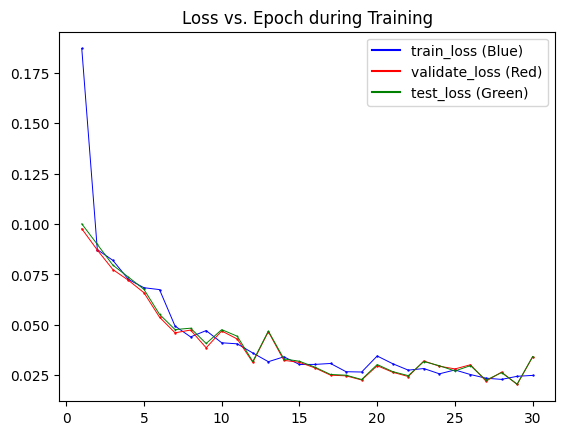

Epoch 30, train loss(MAE)=0.0249, valid loss(MAE)=0.0342, test loss(MAE)=0.0343, lr=0.01, best_test=0.0206
Epoch 31, train loss(MAE)=0.0254, valid loss(MAE)=0.0214, test loss(MAE)=0.0212, lr=0.01, best_test=0.0206
Epoch 32, train loss(MAE)=0.0223, valid loss(MAE)=0.0193, test loss(MAE)=0.0192, lr=0.01, best_test=0.0192
Epoch 33, train loss(MAE)=0.022, valid loss(MAE)=0.0257, test loss(MAE)=0.0255, lr=0.01, best_test=0.0192
Epoch 34, train loss(MAE)=0.0235, valid loss(MAE)=0.0264, test loss(MAE)=0.0264, lr=0.01, best_test=0.0192
Epoch 35, train loss(MAE)=0.0244, valid loss(MAE)=0.025, test loss(MAE)=0.0253, lr=0.01, best_test=0.0192
Epoch 36, train loss(MAE)=0.0245, valid loss(MAE)=0.0186, test loss(MAE)=0.0183, lr=0.01, best_test=0.0183
Epoch 37, train loss(MAE)=0.0201, valid loss(MAE)=0.0231, test loss(MAE)=0.0239, lr=0.01, best_test=0.0183
Epoch 38, train loss(MAE)=0.0204, valid loss(MAE)=0.0242, test loss(MAE)=0.0245, lr=0.01, best_test=0.0183
Epoch 39, train loss(MAE)=0.0194, valid

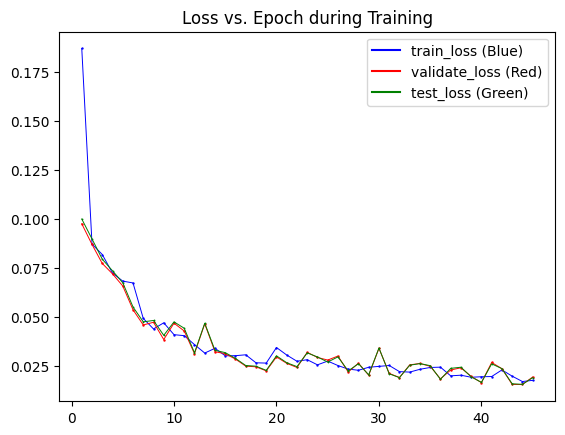

Epoch 45, train loss(MAE)=0.0178, valid loss(MAE)=0.0195, test loss(MAE)=0.0192, lr=0.01, best_test=0.0158
Epoch 46, train loss(MAE)=0.0194, valid loss(MAE)=0.0171, test loss(MAE)=0.0167, lr=0.01, best_test=0.0158
Epoch 47, train loss(MAE)=0.0191, valid loss(MAE)=0.0183, test loss(MAE)=0.0189, lr=0.01, best_test=0.0158
Epoch 48, train loss(MAE)=0.0179, valid loss(MAE)=0.0149, test loss(MAE)=0.0151, lr=0.01, best_test=0.0151
Epoch 49, train loss(MAE)=0.0227, valid loss(MAE)=0.0171, test loss(MAE)=0.0172, lr=0.01, best_test=0.0151
Epoch 50, train loss(MAE)=0.0189, valid loss(MAE)=0.0195, test loss(MAE)=0.02, lr=0.01, best_test=0.0151
Epoch 51, train loss(MAE)=0.0174, valid loss(MAE)=0.019, test loss(MAE)=0.0188, lr=0.01, best_test=0.0151
Epoch 52, train loss(MAE)=0.0178, valid loss(MAE)=0.0173, test loss(MAE)=0.0169, lr=0.01, best_test=0.0151
Epoch 53, train loss(MAE)=0.0183, valid loss(MAE)=0.0205, test loss(MAE)=0.0209, lr=0.01, best_test=0.0151
Epoch 54, train loss(MAE)=0.0178, valid 

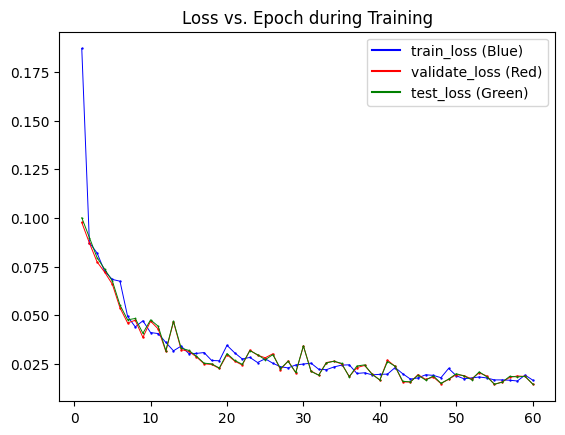

Epoch 60, train loss(MAE)=0.0167, valid loss(MAE)=0.0147, test loss(MAE)=0.0147, lr=0.01, best_test=0.0146
Epoch 61, train loss(MAE)=0.0174, valid loss(MAE)=0.0156, test loss(MAE)=0.0153, lr=0.01, best_test=0.0146
Epoch 62, train loss(MAE)=0.0166, valid loss(MAE)=0.0167, test loss(MAE)=0.0161, lr=0.01, best_test=0.0146
Epoch 63, train loss(MAE)=0.0185, valid loss(MAE)=0.0209, test loss(MAE)=0.0207, lr=0.01, best_test=0.0146
Epoch 64, train loss(MAE)=0.0169, valid loss(MAE)=0.0135, test loss(MAE)=0.0133, lr=0.01, best_test=0.0133
Epoch 65, train loss(MAE)=0.0155, valid loss(MAE)=0.016, test loss(MAE)=0.016, lr=0.01, best_test=0.0133
Epoch 66, train loss(MAE)=0.0156, valid loss(MAE)=0.0186, test loss(MAE)=0.0184, lr=0.01, best_test=0.0133
Epoch 67, train loss(MAE)=0.0164, valid loss(MAE)=0.0128, test loss(MAE)=0.0128, lr=0.01, best_test=0.0128
Epoch 68, train loss(MAE)=0.0157, valid loss(MAE)=0.0171, test loss(MAE)=0.0172, lr=0.01, best_test=0.0128
Epoch 69, train loss(MAE)=0.0161, valid

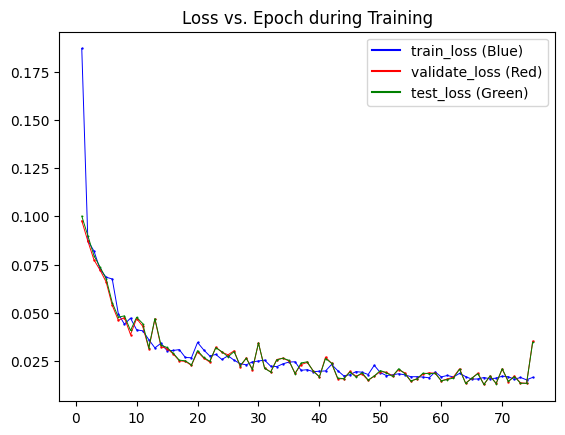

Epoch 75, train loss(MAE)=0.0164, valid loss(MAE)=0.0352, test loss(MAE)=0.0346, lr=0.01, best_test=0.0128
Epoch 76, train loss(MAE)=0.0208, valid loss(MAE)=0.0258, test loss(MAE)=0.0266, lr=0.01, best_test=0.0128
Epoch 77, train loss(MAE)=0.0175, valid loss(MAE)=0.0182, test loss(MAE)=0.019, lr=0.01, best_test=0.0128
Epoch 78, train loss(MAE)=0.0165, valid loss(MAE)=0.0162, test loss(MAE)=0.0165, lr=0.01, best_test=0.0128
Epoch 79, train loss(MAE)=0.0162, valid loss(MAE)=0.0174, test loss(MAE)=0.0171, lr=0.01, best_test=0.0128
Epoch 80, train loss(MAE)=0.0169, valid loss(MAE)=0.0178, test loss(MAE)=0.0176, lr=0.01, best_test=0.0128
Epoch 81, train loss(MAE)=0.0159, valid loss(MAE)=0.0162, test loss(MAE)=0.0162, lr=0.01, best_test=0.0128
Epoch 82, train loss(MAE)=0.0149, valid loss(MAE)=0.0139, test loss(MAE)=0.0136, lr=0.01, best_test=0.0128
Epoch 83, train loss(MAE)=0.0147, valid loss(MAE)=0.0165, test loss(MAE)=0.0167, lr=0.01, best_test=0.0128
Epoch 84, train loss(MAE)=0.0148, vali

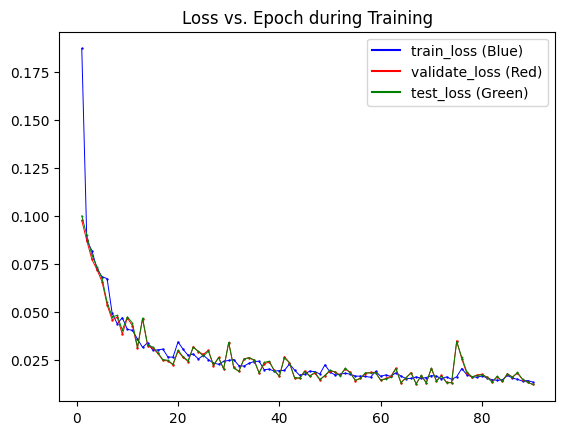

Epoch 90, train loss(MAE)=0.0137, valid loss(MAE)=0.0125, test loss(MAE)=0.0125, lr=0.008, best_test=0.0125
Epoch 91, train loss(MAE)=0.0137, valid loss(MAE)=0.0123, test loss(MAE)=0.0123, lr=0.008, best_test=0.0123
Epoch 92, train loss(MAE)=0.0135, valid loss(MAE)=0.0129, test loss(MAE)=0.0128, lr=0.008, best_test=0.0123
Epoch 93, train loss(MAE)=0.0146, valid loss(MAE)=0.0127, test loss(MAE)=0.0128, lr=0.008, best_test=0.0123
Epoch 94, train loss(MAE)=0.0143, valid loss(MAE)=0.0146, test loss(MAE)=0.0145, lr=0.008, best_test=0.0123
Epoch 95, train loss(MAE)=0.0145, valid loss(MAE)=0.0132, test loss(MAE)=0.0129, lr=0.008, best_test=0.0123
Epoch 96, train loss(MAE)=0.0134, valid loss(MAE)=0.0117, test loss(MAE)=0.0116, lr=0.008, best_test=0.0116
Epoch 97, train loss(MAE)=0.0149, valid loss(MAE)=0.0121, test loss(MAE)=0.0122, lr=0.008, best_test=0.0116
Epoch 98, train loss(MAE)=0.0146, valid loss(MAE)=0.0137, test loss(MAE)=0.0135, lr=0.008, best_test=0.0116
Epoch 99, train loss(MAE)=0.

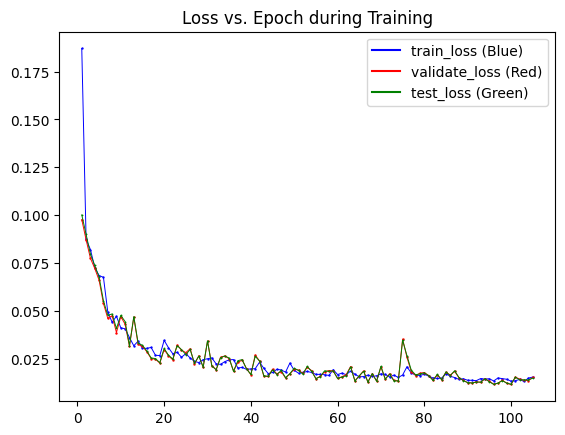

Epoch 105, train loss(MAE)=0.0154, valid loss(MAE)=0.0152, test loss(MAE)=0.0148, lr=0.008, best_test=0.0116
Epoch 106, train loss(MAE)=0.0148, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.008, best_test=0.0116
Epoch 107, train loss(MAE)=0.0139, valid loss(MAE)=0.0108, test loss(MAE)=0.0109, lr=0.008, best_test=0.0109
Epoch 108, train loss(MAE)=0.0133, valid loss(MAE)=0.0121, test loss(MAE)=0.0125, lr=0.008, best_test=0.0109
Epoch 109, train loss(MAE)=0.0138, valid loss(MAE)=0.0115, test loss(MAE)=0.0115, lr=0.008, best_test=0.0109
Epoch 110, train loss(MAE)=0.0129, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.008, best_test=0.0109
Epoch 111, train loss(MAE)=0.0129, valid loss(MAE)=0.0134, test loss(MAE)=0.0136, lr=0.008, best_test=0.0109
Epoch 112, train loss(MAE)=0.0132, valid loss(MAE)=0.0153, test loss(MAE)=0.0157, lr=0.008, best_test=0.0109
Epoch 113, train loss(MAE)=0.0129, valid loss(MAE)=0.0143, test loss(MAE)=0.0142, lr=0.008, best_test=0.0109
Epoch 114, train lo

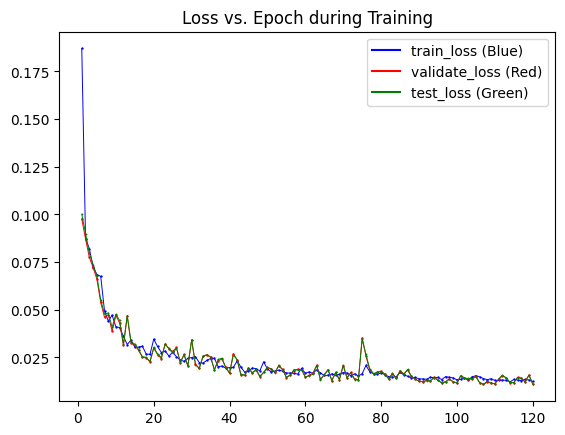

Epoch 120, train loss(MAE)=0.0124, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.008, best_test=0.0109
Epoch 121, train loss(MAE)=0.0128, valid loss(MAE)=0.0124, test loss(MAE)=0.0122, lr=0.008, best_test=0.0109
Epoch 122, train loss(MAE)=0.0132, valid loss(MAE)=0.0119, test loss(MAE)=0.0119, lr=0.008, best_test=0.0109
Epoch 123, train loss(MAE)=0.0134, valid loss(MAE)=0.0108, test loss(MAE)=0.011, lr=0.008, best_test=0.0109
Epoch 124, train loss(MAE)=0.0136, valid loss(MAE)=0.0146, test loss(MAE)=0.0146, lr=0.008, best_test=0.0109
Epoch 125, train loss(MAE)=0.0136, valid loss(MAE)=0.0188, test loss(MAE)=0.0184, lr=0.008, best_test=0.0109
Epoch 126, train loss(MAE)=0.0129, valid loss(MAE)=0.0158, test loss(MAE)=0.0155, lr=0.008, best_test=0.0109
Epoch 127, train loss(MAE)=0.0131, valid loss(MAE)=0.0134, test loss(MAE)=0.0134, lr=0.008, best_test=0.0109
Epoch 128, train loss(MAE)=0.0129, valid loss(MAE)=0.0137, test loss(MAE)=0.0137, lr=0.0064, best_test=0.0109
Epoch 129, train lo

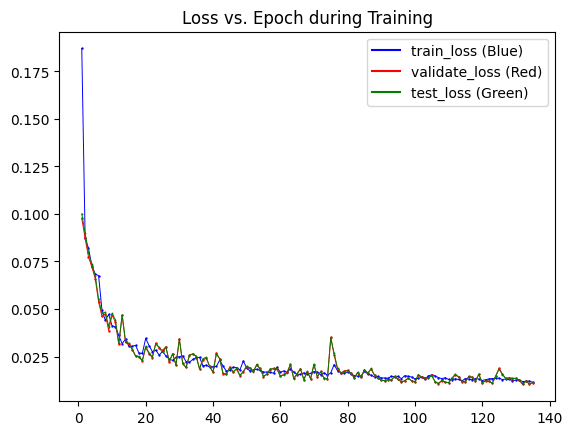

Epoch 135, train loss(MAE)=0.0115, valid loss(MAE)=0.0113, test loss(MAE)=0.0112, lr=0.0064, best_test=0.0105
Epoch 136, train loss(MAE)=0.0114, valid loss(MAE)=0.0106, test loss(MAE)=0.0106, lr=0.0064, best_test=0.0105
Epoch 137, train loss(MAE)=0.0118, valid loss(MAE)=0.0116, test loss(MAE)=0.0117, lr=0.0064, best_test=0.0105
Epoch 138, train loss(MAE)=0.012, valid loss(MAE)=0.0124, test loss(MAE)=0.0124, lr=0.0064, best_test=0.0105
Epoch 139, train loss(MAE)=0.012, valid loss(MAE)=0.0105, test loss(MAE)=0.0107, lr=0.0064, best_test=0.0105
Epoch 140, train loss(MAE)=0.0118, valid loss(MAE)=0.0107, test loss(MAE)=0.0107, lr=0.0064, best_test=0.0105
Epoch 141, train loss(MAE)=0.0116, valid loss(MAE)=0.0137, test loss(MAE)=0.0136, lr=0.0064, best_test=0.0105
Epoch 142, train loss(MAE)=0.0117, valid loss(MAE)=0.011, test loss(MAE)=0.0112, lr=0.0064, best_test=0.0105
Epoch 143, train loss(MAE)=0.0115, valid loss(MAE)=0.0127, test loss(MAE)=0.0127, lr=0.0064, best_test=0.0105
Epoch 144, tr

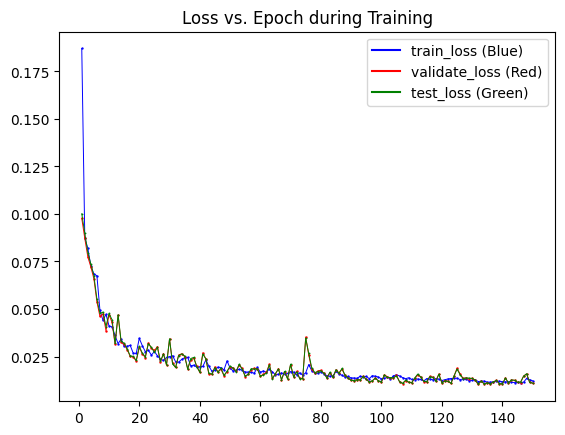

Epoch 150, train loss(MAE)=0.0122, valid loss(MAE)=0.011, test loss(MAE)=0.011, lr=0.0064, best_test=0.0105
Epoch 151, train loss(MAE)=0.0116, valid loss(MAE)=0.013, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0105
Epoch 152, train loss(MAE)=0.0115, valid loss(MAE)=0.0115, test loss(MAE)=0.0113, lr=0.0064, best_test=0.0105
Epoch 153, train loss(MAE)=0.0115, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.00512, best_test=0.0105
Epoch 154, train loss(MAE)=0.0124, valid loss(MAE)=0.0124, test loss(MAE)=0.0123, lr=0.00512, best_test=0.0105
Epoch 155, train loss(MAE)=0.0111, valid loss(MAE)=0.0108, test loss(MAE)=0.0108, lr=0.00512, best_test=0.0105
Epoch 156, train loss(MAE)=0.011, valid loss(MAE)=0.0109, test loss(MAE)=0.0107, lr=0.00512, best_test=0.0105
Epoch 157, train loss(MAE)=0.0112, valid loss(MAE)=0.0108, test loss(MAE)=0.011, lr=0.00512, best_test=0.0105
Epoch 158, train loss(MAE)=0.0111, valid loss(MAE)=0.0117, test loss(MAE)=0.0115, lr=0.00512, best_test=0.0105
Epoch 159

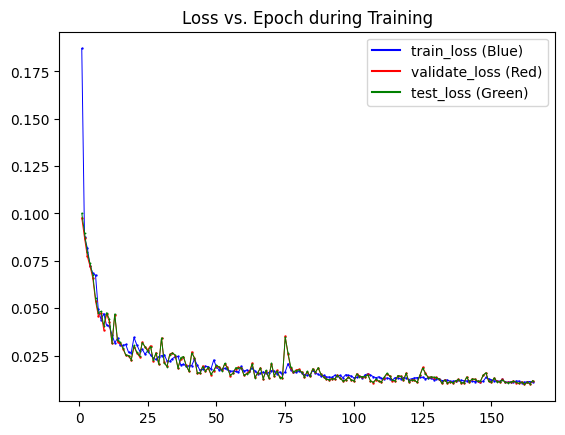

Epoch 165, train loss(MAE)=0.011, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.00512, best_test=0.0099
Epoch 166, train loss(MAE)=0.0116, valid loss(MAE)=0.0108, test loss(MAE)=0.0107, lr=0.00512, best_test=0.0099
Epoch 167, train loss(MAE)=0.0109, valid loss(MAE)=0.0107, test loss(MAE)=0.0107, lr=0.00512, best_test=0.0099
Epoch 168, train loss(MAE)=0.0115, valid loss(MAE)=0.0113, test loss(MAE)=0.011, lr=0.00512, best_test=0.0099
Epoch 169, train loss(MAE)=0.011, valid loss(MAE)=0.0108, test loss(MAE)=0.0108, lr=0.00512, best_test=0.0099
Epoch 170, train loss(MAE)=0.0107, valid loss(MAE)=0.0102, test loss(MAE)=0.0102, lr=0.00512, best_test=0.0099
Epoch 171, train loss(MAE)=0.0108, valid loss(MAE)=0.0105, test loss(MAE)=0.0105, lr=0.00512, best_test=0.0099
Epoch 172, train loss(MAE)=0.0107, valid loss(MAE)=0.011, test loss(MAE)=0.0109, lr=0.00512, best_test=0.0099
Epoch 173, train loss(MAE)=0.0106, valid loss(MAE)=0.0101, test loss(MAE)=0.0102, lr=0.00512, best_test=0.0099
Epoch

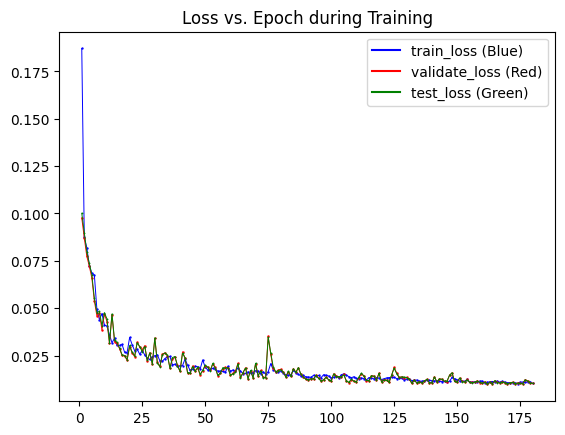

Epoch 180, train loss(MAE)=0.0103, valid loss(MAE)=0.0103, test loss(MAE)=0.0104, lr=0.00512, best_test=0.0099
Epoch 181, train loss(MAE)=0.0103, valid loss(MAE)=0.0109, test loss(MAE)=0.0113, lr=0.00512, best_test=0.0099
Epoch 182, train loss(MAE)=0.0105, valid loss(MAE)=0.01, test loss(MAE)=0.0099, lr=0.00512, best_test=0.0099
Epoch 183, train loss(MAE)=0.0103, valid loss(MAE)=0.0107, test loss(MAE)=0.0107, lr=0.004096, best_test=0.0099
Epoch 184, train loss(MAE)=0.0108, valid loss(MAE)=0.0102, test loss(MAE)=0.0103, lr=0.004096, best_test=0.0099
Epoch 185, train loss(MAE)=0.0098, valid loss(MAE)=0.0094, test loss(MAE)=0.0094, lr=0.004096, best_test=0.0094
Epoch 186, train loss(MAE)=0.0099, valid loss(MAE)=0.0102, test loss(MAE)=0.0103, lr=0.004096, best_test=0.0094
Epoch 187, train loss(MAE)=0.0112, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.004096, best_test=0.0094
Epoch 188, train loss(MAE)=0.0101, valid loss(MAE)=0.0103, test loss(MAE)=0.0103, lr=0.004096, best_test=0.00

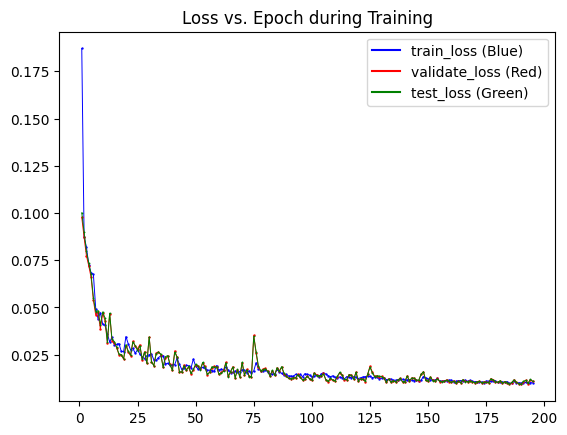

Epoch 195, train loss(MAE)=0.0102, valid loss(MAE)=0.0108, test loss(MAE)=0.011, lr=0.004096, best_test=0.0092
Epoch 196, train loss(MAE)=0.0105, valid loss(MAE)=0.0096, test loss(MAE)=0.0095, lr=0.004096, best_test=0.0092
Epoch 197, train loss(MAE)=0.0105, valid loss(MAE)=0.0102, test loss(MAE)=0.0102, lr=0.004096, best_test=0.0092
Epoch 198, train loss(MAE)=0.0099, valid loss(MAE)=0.0098, test loss(MAE)=0.0097, lr=0.004096, best_test=0.0092
Epoch 199, train loss(MAE)=0.01, valid loss(MAE)=0.0107, test loss(MAE)=0.0107, lr=0.004096, best_test=0.0092
Epoch 200, train loss(MAE)=0.0098, valid loss(MAE)=0.0098, test loss(MAE)=0.0098, lr=0.004096, best_test=0.0092
Epoch 201, train loss(MAE)=0.0099, valid loss(MAE)=0.0103, test loss(MAE)=0.0103, lr=0.004096, best_test=0.0092
Epoch 202, train loss(MAE)=0.0101, valid loss(MAE)=0.0117, test loss(MAE)=0.0116, lr=0.004096, best_test=0.0092
Epoch 203, train loss(MAE)=0.0104, valid loss(MAE)=0.0102, test loss(MAE)=0.0102, lr=0.004096, best_test=0.

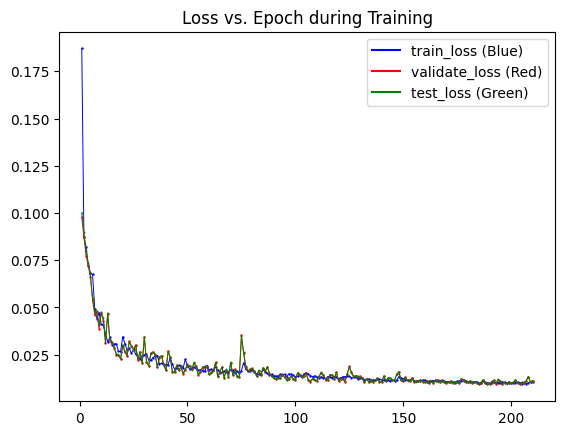

Epoch 210, train loss(MAE)=0.0104, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.004096, best_test=0.0092
Epoch 211, train loss(MAE)=0.01, valid loss(MAE)=0.01, test loss(MAE)=0.01, lr=0.0032768, best_test=0.0092
Epoch 212, train loss(MAE)=0.0102, valid loss(MAE)=0.0107, test loss(MAE)=0.0107, lr=0.0032768, best_test=0.0092
Epoch 213, train loss(MAE)=0.01, valid loss(MAE)=0.0098, test loss(MAE)=0.0098, lr=0.0032768, best_test=0.0092
Epoch 214, train loss(MAE)=0.0095, valid loss(MAE)=0.0105, test loss(MAE)=0.0108, lr=0.0032768, best_test=0.0092
Epoch 215, train loss(MAE)=0.0099, valid loss(MAE)=0.0109, test loss(MAE)=0.011, lr=0.0032768, best_test=0.0092
Epoch 216, train loss(MAE)=0.0096, valid loss(MAE)=0.0103, test loss(MAE)=0.0102, lr=0.0032768, best_test=0.0092
Epoch 217, train loss(MAE)=0.0098, valid loss(MAE)=0.0109, test loss(MAE)=0.0108, lr=0.0032768, best_test=0.0092
Epoch 218, train loss(MAE)=0.0098, valid loss(MAE)=0.0095, test loss(MAE)=0.0095, lr=0.0032768, best_test=

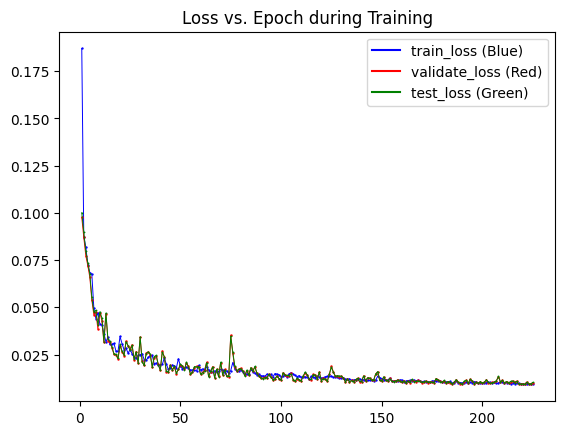

Epoch 225, train loss(MAE)=0.0094, valid loss(MAE)=0.0101, test loss(MAE)=0.0102, lr=0.0032768, best_test=0.0091
Epoch 226, train loss(MAE)=0.0097, valid loss(MAE)=0.0103, test loss(MAE)=0.0103, lr=0.0032768, best_test=0.0091
Epoch 227, train loss(MAE)=0.0092, valid loss(MAE)=0.0094, test loss(MAE)=0.0093, lr=0.0032768, best_test=0.0091
Epoch 228, train loss(MAE)=0.0096, valid loss(MAE)=0.0104, test loss(MAE)=0.0102, lr=0.0032768, best_test=0.0091
Epoch 229, train loss(MAE)=0.0098, valid loss(MAE)=0.0108, test loss(MAE)=0.0105, lr=0.0032768, best_test=0.0091
Epoch 230, train loss(MAE)=0.0098, valid loss(MAE)=0.0101, test loss(MAE)=0.0101, lr=0.0032768, best_test=0.0091
Epoch 231, train loss(MAE)=0.01, valid loss(MAE)=0.0097, test loss(MAE)=0.0098, lr=0.0032768, best_test=0.0091
Epoch 232, train loss(MAE)=0.0092, valid loss(MAE)=0.0093, test loss(MAE)=0.0094, lr=0.0032768, best_test=0.0091
Epoch 233, train loss(MAE)=0.0094, valid loss(MAE)=0.0095, test loss(MAE)=0.0094, lr=0.0032768, be

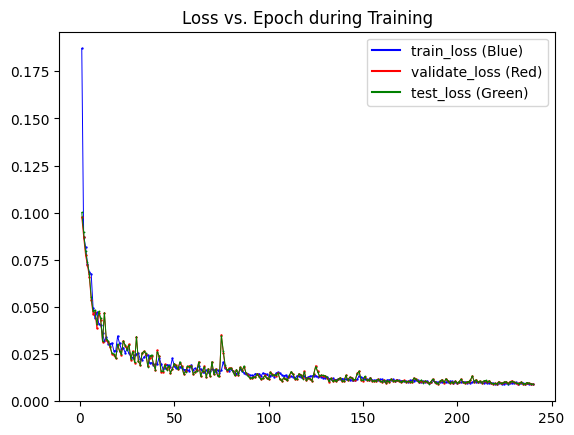

Epoch 240, train loss(MAE)=0.009, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.0032768, best_test=0.009
Epoch 241, train loss(MAE)=0.009, valid loss(MAE)=0.0106, test loss(MAE)=0.0108, lr=0.0032768, best_test=0.009
Epoch 242, train loss(MAE)=0.0092, valid loss(MAE)=0.0093, test loss(MAE)=0.0093, lr=0.0032768, best_test=0.009
Epoch 243, train loss(MAE)=0.0093, valid loss(MAE)=0.0096, test loss(MAE)=0.0095, lr=0.0032768, best_test=0.009
Epoch 244, train loss(MAE)=0.0092, valid loss(MAE)=0.0107, test loss(MAE)=0.0106, lr=0.0032768, best_test=0.009
Epoch 245, train loss(MAE)=0.009, valid loss(MAE)=0.0098, test loss(MAE)=0.0098, lr=0.0032768, best_test=0.009
Epoch 246, train loss(MAE)=0.009, valid loss(MAE)=0.0094, test loss(MAE)=0.0092, lr=0.0032768, best_test=0.009
Epoch 247, train loss(MAE)=0.0093, valid loss(MAE)=0.0116, test loss(MAE)=0.0117, lr=0.0032768, best_test=0.009
Epoch 248, train loss(MAE)=0.0092, valid loss(MAE)=0.0108, test loss(MAE)=0.0107, lr=0.0032768, best_test=0.00

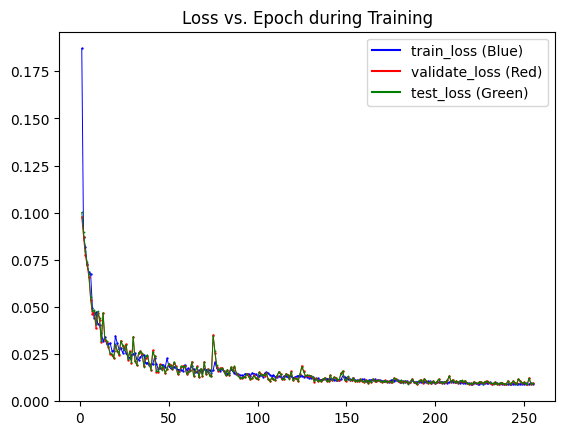

Epoch 255, train loss(MAE)=0.0089, valid loss(MAE)=0.0095, test loss(MAE)=0.0094, lr=0.0032768, best_test=0.009
Epoch 256, train loss(MAE)=0.0089, valid loss(MAE)=0.0094, test loss(MAE)=0.0096, lr=0.0032768, best_test=0.009
Epoch 257, train loss(MAE)=0.009, valid loss(MAE)=0.0096, test loss(MAE)=0.0097, lr=0.0032768, best_test=0.009
Epoch 258, train loss(MAE)=0.0091, valid loss(MAE)=0.0101, test loss(MAE)=0.01, lr=0.0032768, best_test=0.009
Epoch 259, train loss(MAE)=0.0089, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.0032768, best_test=0.009
Epoch 260, train loss(MAE)=0.0095, valid loss(MAE)=0.0112, test loss(MAE)=0.011, lr=0.0032768, best_test=0.009
Epoch 261, train loss(MAE)=0.0087, valid loss(MAE)=0.0092, test loss(MAE)=0.0093, lr=0.0032768, best_test=0.009
Epoch 262, train loss(MAE)=0.0087, valid loss(MAE)=0.0099, test loss(MAE)=0.0099, lr=0.0032768, best_test=0.009
Epoch 263, train loss(MAE)=0.0092, valid loss(MAE)=0.0106, test loss(MAE)=0.0107, lr=0.0032768, best_test=0.00

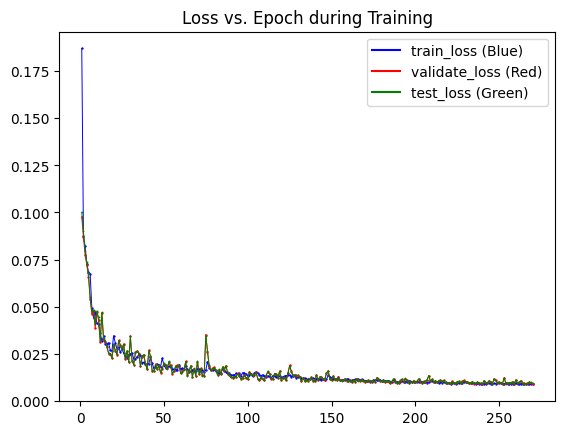

Epoch 270, train loss(MAE)=0.009, valid loss(MAE)=0.0091, test loss(MAE)=0.0092, lr=0.0032768, best_test=0.009
Epoch 271, train loss(MAE)=0.0089, valid loss(MAE)=0.0088, test loss(MAE)=0.0088, lr=0.0032768, best_test=0.0088
Epoch 272, train loss(MAE)=0.0088, valid loss(MAE)=0.0089, test loss(MAE)=0.0089, lr=0.0032768, best_test=0.0088
Epoch 273, train loss(MAE)=0.0091, valid loss(MAE)=0.0089, test loss(MAE)=0.009, lr=0.0032768, best_test=0.0088
Epoch 274, train loss(MAE)=0.0089, valid loss(MAE)=0.0092, test loss(MAE)=0.0091, lr=0.0032768, best_test=0.0088
Epoch 275, train loss(MAE)=0.0092, valid loss(MAE)=0.0103, test loss(MAE)=0.0103, lr=0.0032768, best_test=0.0088
Epoch 276, train loss(MAE)=0.009, valid loss(MAE)=0.0095, test loss(MAE)=0.0096, lr=0.0032768, best_test=0.0088
Epoch 277, train loss(MAE)=0.0088, valid loss(MAE)=0.0088, test loss(MAE)=0.0089, lr=0.0032768, best_test=0.0088
Epoch 278, train loss(MAE)=0.0088, valid loss(MAE)=0.0092, test loss(MAE)=0.0091, lr=0.0032768, best

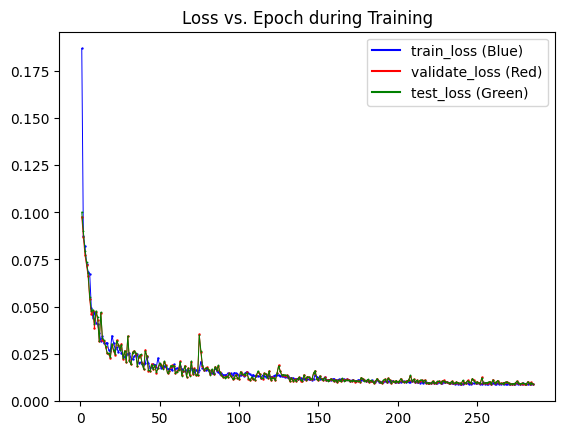

Epoch 285, train loss(MAE)=0.0086, valid loss(MAE)=0.0089, test loss(MAE)=0.0089, lr=0.0032768, best_test=0.0088
Epoch 286, train loss(MAE)=0.0088, valid loss(MAE)=0.0092, test loss(MAE)=0.0091, lr=0.0032768, best_test=0.0088
Epoch 287, train loss(MAE)=0.009, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.0032768, best_test=0.0088
Epoch 288, train loss(MAE)=0.0088, valid loss(MAE)=0.0094, test loss(MAE)=0.0096, lr=0.0032768, best_test=0.0088
Epoch 289, train loss(MAE)=0.0096, valid loss(MAE)=0.0104, test loss(MAE)=0.0103, lr=0.0032768, best_test=0.0088
Epoch 290, train loss(MAE)=0.0091, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.0032768, best_test=0.0088
Epoch 291, train loss(MAE)=0.0087, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.0032768, best_test=0.0088
Epoch 292, train loss(MAE)=0.0087, valid loss(MAE)=0.0094, test loss(MAE)=0.0094, lr=0.00262144, best_test=0.0088
Epoch 293, train loss(MAE)=0.0087, valid loss(MAE)=0.0097, test loss(MAE)=0.0096, lr=0.00262144, best_

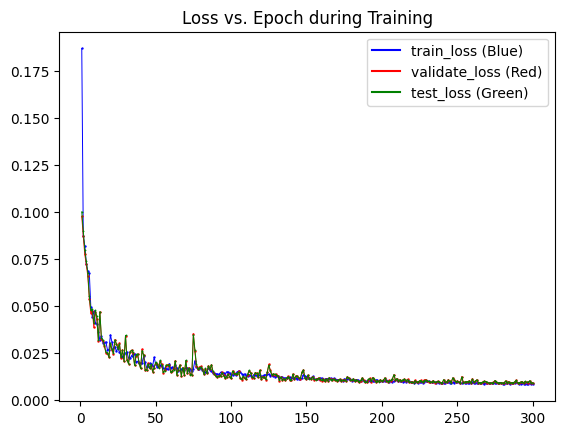

Epoch 300, train loss(MAE)=0.0082, valid loss(MAE)=0.0091, test loss(MAE)=0.0091, lr=0.00262144, best_test=0.0088
Epoch 301, train loss(MAE)=0.0085, valid loss(MAE)=0.0088, test loss(MAE)=0.0089, lr=0.00262144, best_test=0.0088
Epoch 302, train loss(MAE)=0.0084, valid loss(MAE)=0.0087, test loss(MAE)=0.0087, lr=0.00262144, best_test=0.0087
Epoch 303, train loss(MAE)=0.0084, valid loss(MAE)=0.0094, test loss(MAE)=0.0094, lr=0.00262144, best_test=0.0087
Epoch 304, train loss(MAE)=0.0086, valid loss(MAE)=0.0096, test loss(MAE)=0.0096, lr=0.00262144, best_test=0.0087
Epoch 305, train loss(MAE)=0.0088, valid loss(MAE)=0.0095, test loss(MAE)=0.0095, lr=0.00262144, best_test=0.0087
Epoch 306, train loss(MAE)=0.0086, valid loss(MAE)=0.0089, test loss(MAE)=0.0089, lr=0.00262144, best_test=0.0087
Epoch 307, train loss(MAE)=0.0083, valid loss(MAE)=0.0095, test loss(MAE)=0.0095, lr=0.00262144, best_test=0.0087
Epoch 308, train loss(MAE)=0.0085, valid loss(MAE)=0.0092, test loss(MAE)=0.0092, lr=0.0

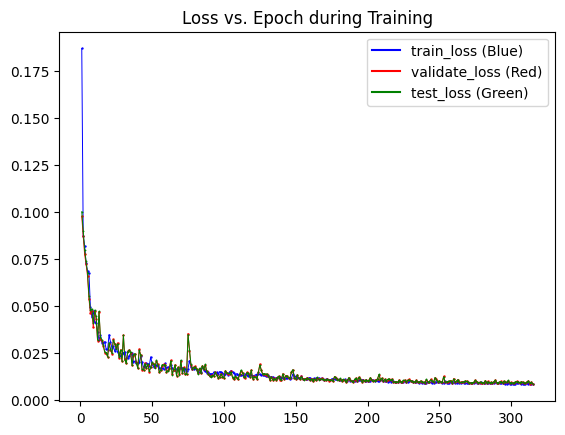

Epoch 315, train loss(MAE)=0.0084, valid loss(MAE)=0.0084, test loss(MAE)=0.0085, lr=0.00262144, best_test=0.0085
Epoch 316, train loss(MAE)=0.0082, valid loss(MAE)=0.0085, test loss(MAE)=0.0086, lr=0.00262144, best_test=0.0085
Epoch 317, train loss(MAE)=0.0084, valid loss(MAE)=0.0089, test loss(MAE)=0.009, lr=0.00262144, best_test=0.0085
Epoch 318, train loss(MAE)=0.008, valid loss(MAE)=0.0091, test loss(MAE)=0.009, lr=0.00262144, best_test=0.0085
Epoch 319, train loss(MAE)=0.008, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.00262144, best_test=0.0085
Epoch 320, train loss(MAE)=0.0084, valid loss(MAE)=0.0088, test loss(MAE)=0.0089, lr=0.00262144, best_test=0.0085
Epoch 321, train loss(MAE)=0.0081, valid loss(MAE)=0.0086, test loss(MAE)=0.0087, lr=0.00262144, best_test=0.0085
Epoch 322, train loss(MAE)=0.0081, valid loss(MAE)=0.0086, test loss(MAE)=0.0085, lr=0.00262144, best_test=0.0085
Epoch 323, train loss(MAE)=0.0082, valid loss(MAE)=0.0092, test loss(MAE)=0.009, lr=0.00262144

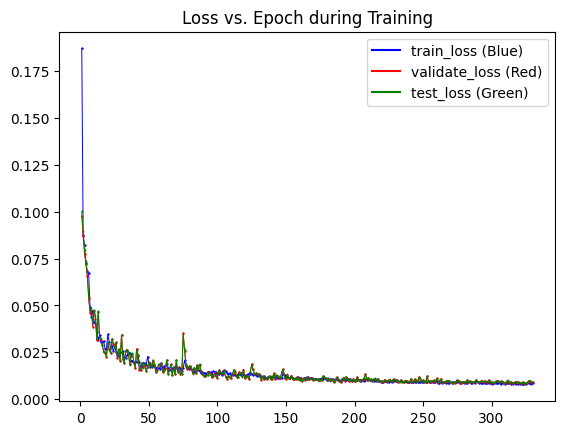

Epoch 330, train loss(MAE)=0.0084, valid loss(MAE)=0.009, test loss(MAE)=0.009, lr=0.00262144, best_test=0.0085
Epoch 331, train loss(MAE)=0.0083, valid loss(MAE)=0.0087, test loss(MAE)=0.0086, lr=0.00262144, best_test=0.0085
Epoch 332, train loss(MAE)=0.0078, valid loss(MAE)=0.0085, test loss(MAE)=0.0085, lr=0.00262144, best_test=0.0085
Epoch 333, train loss(MAE)=0.0084, valid loss(MAE)=0.0105, test loss(MAE)=0.0104, lr=0.00262144, best_test=0.0085
Epoch 334, train loss(MAE)=0.0088, valid loss(MAE)=0.0085, test loss(MAE)=0.0086, lr=0.00262144, best_test=0.0085
Epoch 335, train loss(MAE)=0.009, valid loss(MAE)=0.0091, test loss(MAE)=0.0091, lr=0.00262144, best_test=0.0085
Epoch 336, train loss(MAE)=0.008, valid loss(MAE)=0.009, test loss(MAE)=0.0092, lr=0.00209715, best_test=0.0085
Epoch 337, train loss(MAE)=0.0079, valid loss(MAE)=0.0087, test loss(MAE)=0.0088, lr=0.00209715, best_test=0.0085
Epoch 338, train loss(MAE)=0.0078, valid loss(MAE)=0.0083, test loss(MAE)=0.0085, lr=0.002097

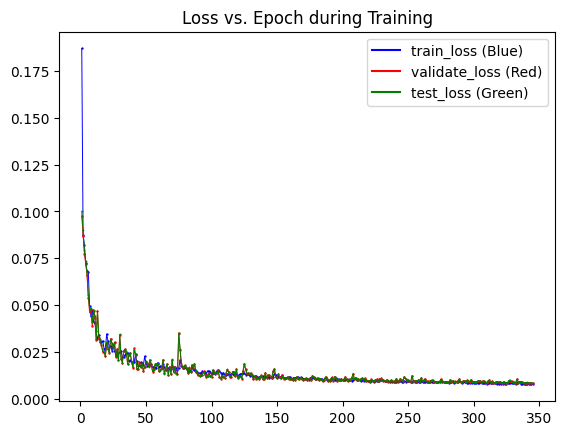

Epoch 345, train loss(MAE)=0.008, valid loss(MAE)=0.0083, test loss(MAE)=0.0083, lr=0.00209715, best_test=0.0083
Epoch 346, train loss(MAE)=0.0078, valid loss(MAE)=0.0087, test loss(MAE)=0.0087, lr=0.00209715, best_test=0.0083
Epoch 347, train loss(MAE)=0.0079, valid loss(MAE)=0.0107, test loss(MAE)=0.0105, lr=0.00209715, best_test=0.0083
Epoch 348, train loss(MAE)=0.0082, valid loss(MAE)=0.0089, test loss(MAE)=0.0088, lr=0.00209715, best_test=0.0083
Epoch 349, train loss(MAE)=0.0081, valid loss(MAE)=0.0086, test loss(MAE)=0.0086, lr=0.00209715, best_test=0.0083
Epoch 350, train loss(MAE)=0.008, valid loss(MAE)=0.0091, test loss(MAE)=0.009, lr=0.00209715, best_test=0.0083
Epoch 351, train loss(MAE)=0.0082, valid loss(MAE)=0.0085, test loss(MAE)=0.0086, lr=0.00209715, best_test=0.0083
Epoch 352, train loss(MAE)=0.0076, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00209715, best_test=0.0083
Epoch 353, train loss(MAE)=0.0078, valid loss(MAE)=0.0087, test loss(MAE)=0.0087, lr=0.0020

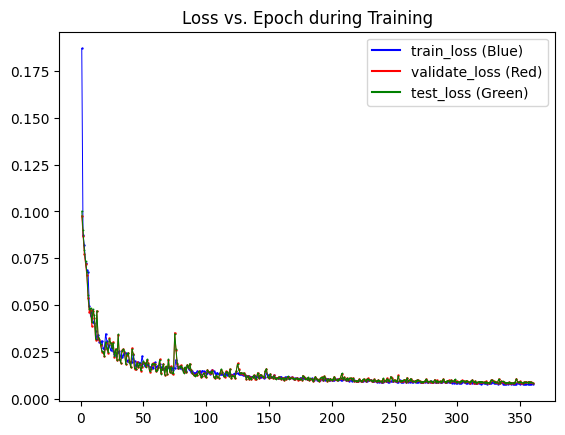

Epoch 360, train loss(MAE)=0.0076, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00209715, best_test=0.0083
Epoch 361, train loss(MAE)=0.008, valid loss(MAE)=0.01, test loss(MAE)=0.0099, lr=0.00209715, best_test=0.0083
Epoch 362, train loss(MAE)=0.0078, valid loss(MAE)=0.0092, test loss(MAE)=0.0092, lr=0.00209715, best_test=0.0083
Epoch 363, train loss(MAE)=0.0075, valid loss(MAE)=0.0085, test loss(MAE)=0.0086, lr=0.00209715, best_test=0.0083
Epoch 364, train loss(MAE)=0.0076, valid loss(MAE)=0.0086, test loss(MAE)=0.0087, lr=0.00209715, best_test=0.0083
Epoch 365, train loss(MAE)=0.0076, valid loss(MAE)=0.0084, test loss(MAE)=0.0083, lr=0.00209715, best_test=0.0083
Epoch 366, train loss(MAE)=0.0077, valid loss(MAE)=0.0084, test loss(MAE)=0.0086, lr=0.00209715, best_test=0.0083
Epoch 367, train loss(MAE)=0.0079, valid loss(MAE)=0.01, test loss(MAE)=0.01, lr=0.00209715, best_test=0.0083
Epoch 368, train loss(MAE)=0.0079, valid loss(MAE)=0.0092, test loss(MAE)=0.0092, lr=0.00209715

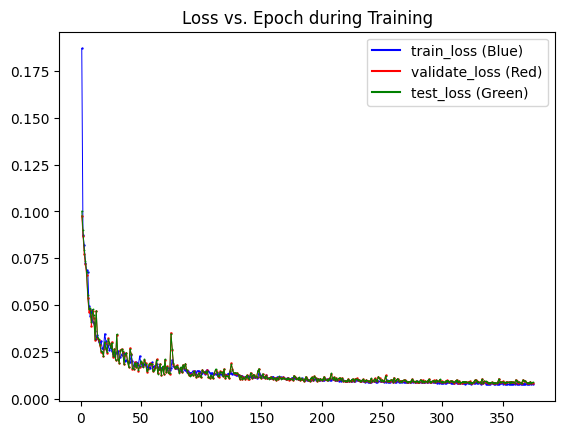

Epoch 375, train loss(MAE)=0.0077, valid loss(MAE)=0.0085, test loss(MAE)=0.0087, lr=0.00167772, best_test=0.0083
Epoch 376, train loss(MAE)=0.0075, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00167772, best_test=0.0083
Epoch 377, train loss(MAE)=0.008, valid loss(MAE)=0.0083, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0083
Epoch 378, train loss(MAE)=0.0074, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0083
Epoch 379, train loss(MAE)=0.0074, valid loss(MAE)=0.0083, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0083
Epoch 380, train loss(MAE)=0.0077, valid loss(MAE)=0.0108, test loss(MAE)=0.0106, lr=0.00167772, best_test=0.0083
Epoch 381, train loss(MAE)=0.0075, valid loss(MAE)=0.0082, test loss(MAE)=0.0082, lr=0.00167772, best_test=0.0082
Epoch 382, train loss(MAE)=0.0074, valid loss(MAE)=0.0084, test loss(MAE)=0.0085, lr=0.00167772, best_test=0.0082
Epoch 383, train loss(MAE)=0.0073, valid loss(MAE)=0.0089, test loss(MAE)=0.0088, lr=0.00

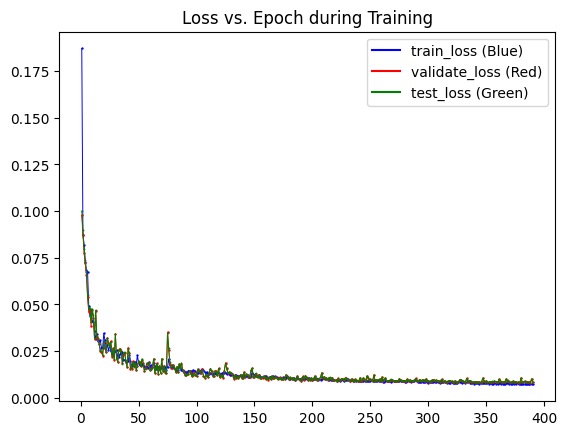

Epoch 390, train loss(MAE)=0.0074, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0082
Epoch 391, train loss(MAE)=0.0074, valid loss(MAE)=0.0083, test loss(MAE)=0.0085, lr=0.00167772, best_test=0.0082
Epoch 392, train loss(MAE)=0.0074, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0082
Epoch 393, train loss(MAE)=0.0074, valid loss(MAE)=0.0087, test loss(MAE)=0.0087, lr=0.00167772, best_test=0.0082
Epoch 394, train loss(MAE)=0.0078, valid loss(MAE)=0.0089, test loss(MAE)=0.0091, lr=0.00167772, best_test=0.0082
Epoch 395, train loss(MAE)=0.0074, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0082
Epoch 396, train loss(MAE)=0.0073, valid loss(MAE)=0.008, test loss(MAE)=0.0082, lr=0.00167772, best_test=0.0082
Epoch 397, train loss(MAE)=0.0073, valid loss(MAE)=0.0086, test loss(MAE)=0.0086, lr=0.00167772, best_test=0.0082
Epoch 398, train loss(MAE)=0.0073, valid loss(MAE)=0.0086, test loss(MAE)=0.0086, lr=0.00

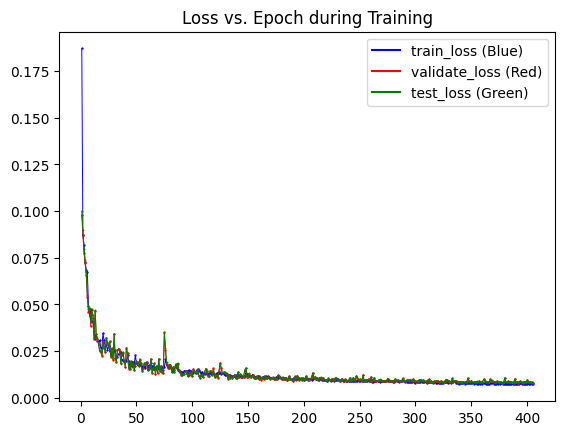

Epoch 405, train loss(MAE)=0.0074, valid loss(MAE)=0.0082, test loss(MAE)=0.0081, lr=0.00167772, best_test=0.0081
Epoch 406, train loss(MAE)=0.0073, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00167772, best_test=0.0081
Epoch 407, train loss(MAE)=0.0072, valid loss(MAE)=0.0084, test loss(MAE)=0.0085, lr=0.00167772, best_test=0.0081
Epoch 408, train loss(MAE)=0.0071, valid loss(MAE)=0.0084, test loss(MAE)=0.0085, lr=0.00167772, best_test=0.0081
Epoch 409, train loss(MAE)=0.0071, valid loss(MAE)=0.0085, test loss(MAE)=0.0084, lr=0.00167772, best_test=0.0081
Epoch 410, train loss(MAE)=0.0071, valid loss(MAE)=0.0089, test loss(MAE)=0.0089, lr=0.00167772, best_test=0.0081
Epoch 411, train loss(MAE)=0.0073, valid loss(MAE)=0.0081, test loss(MAE)=0.0081, lr=0.00167772, best_test=0.0081
Epoch 412, train loss(MAE)=0.0073, valid loss(MAE)=0.0086, test loss(MAE)=0.0085, lr=0.00167772, best_test=0.0081
Epoch 413, train loss(MAE)=0.0075, valid loss(MAE)=0.0082, test loss(MAE)=0.0084, lr=0.0

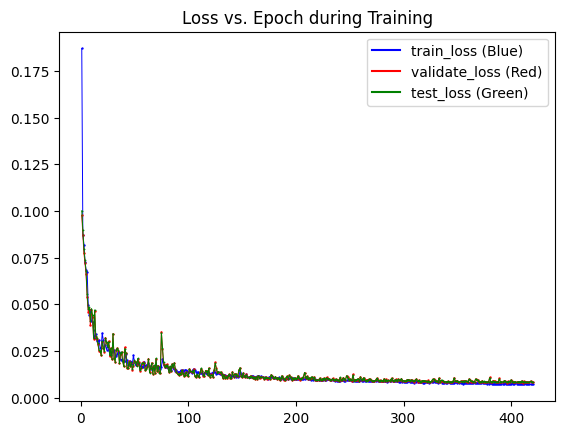

Epoch 420, train loss(MAE)=0.0071, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00134218, best_test=0.0081
Epoch 421, train loss(MAE)=0.0072, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00134218, best_test=0.0081
Epoch 422, train loss(MAE)=0.007, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00134218, best_test=0.0081
Epoch 423, train loss(MAE)=0.0071, valid loss(MAE)=0.0081, test loss(MAE)=0.0081, lr=0.00134218, best_test=0.0081
Epoch 424, train loss(MAE)=0.0069, valid loss(MAE)=0.0085, test loss(MAE)=0.0084, lr=0.00134218, best_test=0.0081
Epoch 425, train loss(MAE)=0.007, valid loss(MAE)=0.0083, test loss(MAE)=0.0083, lr=0.00134218, best_test=0.0081
Epoch 426, train loss(MAE)=0.0073, valid loss(MAE)=0.008, test loss(MAE)=0.0081, lr=0.00134218, best_test=0.0081
Epoch 427, train loss(MAE)=0.007, valid loss(MAE)=0.0088, test loss(MAE)=0.0089, lr=0.00134218, best_test=0.0081
Epoch 428, train loss(MAE)=0.007, valid loss(MAE)=0.0088, test loss(MAE)=0.0088, lr=0.001342

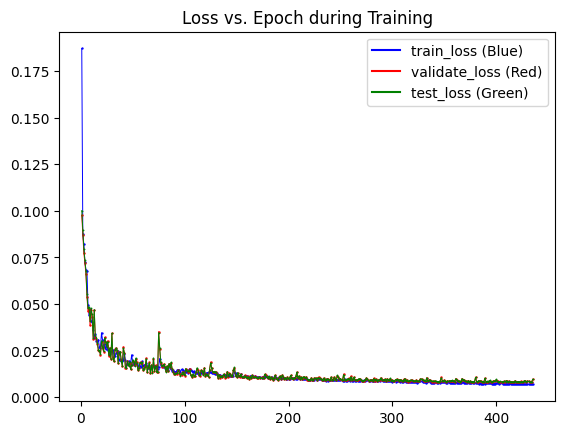

Epoch 435, train loss(MAE)=0.007, valid loss(MAE)=0.0096, test loss(MAE)=0.0096, lr=0.00134218, best_test=0.0081
Epoch 436, train loss(MAE)=0.0069, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00134218, best_test=0.0081
Epoch 437, train loss(MAE)=0.0071, valid loss(MAE)=0.0085, test loss(MAE)=0.0085, lr=0.00134218, best_test=0.0081
Epoch 438, train loss(MAE)=0.007, valid loss(MAE)=0.0082, test loss(MAE)=0.0082, lr=0.00134218, best_test=0.0081
Epoch 439, train loss(MAE)=0.0068, valid loss(MAE)=0.008, test loss(MAE)=0.008, lr=0.00134218, best_test=0.008
Epoch 440, train loss(MAE)=0.0071, valid loss(MAE)=0.0087, test loss(MAE)=0.0089, lr=0.00134218, best_test=0.008
Epoch 441, train loss(MAE)=0.0071, valid loss(MAE)=0.0092, test loss(MAE)=0.0093, lr=0.00134218, best_test=0.008
Epoch 442, train loss(MAE)=0.0071, valid loss(MAE)=0.009, test loss(MAE)=0.0091, lr=0.00134218, best_test=0.008
Epoch 443, train loss(MAE)=0.0069, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00134218, 

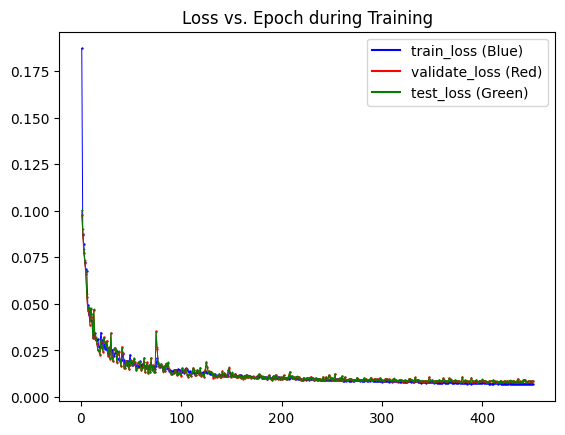

Epoch 450, train loss(MAE)=0.007, valid loss(MAE)=0.0084, test loss(MAE)=0.0085, lr=0.00134218, best_test=0.008
Epoch 451, train loss(MAE)=0.0068, valid loss(MAE)=0.0081, test loss(MAE)=0.008, lr=0.00134218, best_test=0.008
Epoch 452, train loss(MAE)=0.0068, valid loss(MAE)=0.0086, test loss(MAE)=0.0086, lr=0.00134218, best_test=0.008
Epoch 453, train loss(MAE)=0.007, valid loss(MAE)=0.0085, test loss(MAE)=0.0086, lr=0.00134218, best_test=0.008
Epoch 454, train loss(MAE)=0.0068, valid loss(MAE)=0.0079, test loss(MAE)=0.008, lr=0.00134218, best_test=0.008
Epoch 455, train loss(MAE)=0.0069, valid loss(MAE)=0.008, test loss(MAE)=0.0081, lr=0.00134218, best_test=0.008
Epoch 456, train loss(MAE)=0.0071, valid loss(MAE)=0.0083, test loss(MAE)=0.0084, lr=0.00134218, best_test=0.008
Epoch 457, train loss(MAE)=0.0068, valid loss(MAE)=0.0081, test loss(MAE)=0.0083, lr=0.00134218, best_test=0.008
Epoch 458, train loss(MAE)=0.0069, valid loss(MAE)=0.0079, test loss(MAE)=0.0079, lr=0.00134218, best

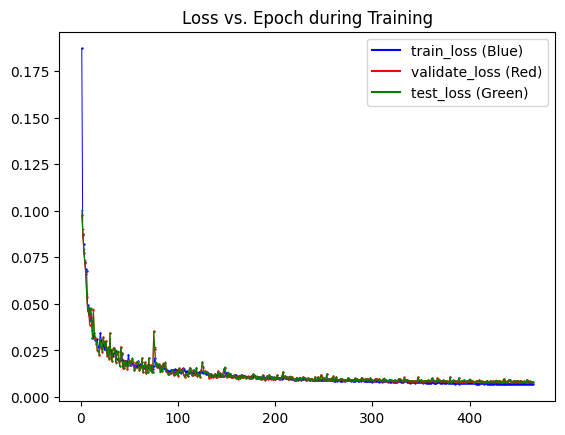

Epoch 465, train loss(MAE)=0.007, valid loss(MAE)=0.0078, test loss(MAE)=0.0079, lr=0.00134218, best_test=0.0079
Epoch 466, train loss(MAE)=0.0066, valid loss(MAE)=0.0088, test loss(MAE)=0.009, lr=0.00134218, best_test=0.0079
Epoch 467, train loss(MAE)=0.0069, valid loss(MAE)=0.0079, test loss(MAE)=0.008, lr=0.00134218, best_test=0.0079
Epoch 468, train loss(MAE)=0.007, valid loss(MAE)=0.0082, test loss(MAE)=0.0082, lr=0.00134218, best_test=0.0079
Epoch 469, train loss(MAE)=0.0067, valid loss(MAE)=0.0086, test loss(MAE)=0.0087, lr=0.00134218, best_test=0.0079
Epoch 470, train loss(MAE)=0.0069, valid loss(MAE)=0.0087, test loss(MAE)=0.0087, lr=0.00134218, best_test=0.0079
Epoch 471, train loss(MAE)=0.0067, valid loss(MAE)=0.0079, test loss(MAE)=0.008, lr=0.00134218, best_test=0.0079
Epoch 472, train loss(MAE)=0.007, valid loss(MAE)=0.0086, test loss(MAE)=0.0088, lr=0.00134218, best_test=0.0079
Epoch 473, train loss(MAE)=0.0069, valid loss(MAE)=0.0083, test loss(MAE)=0.0084, lr=0.0013421

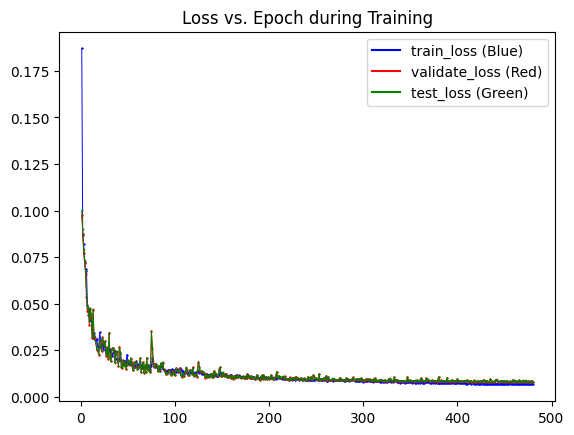

Epoch 480, train loss(MAE)=0.0068, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00134218, best_test=0.0079
Epoch 481, train loss(MAE)=0.0066, valid loss(MAE)=0.008, test loss(MAE)=0.008, lr=0.00134218, best_test=0.0079
Epoch 482, train loss(MAE)=0.0066, valid loss(MAE)=0.0085, test loss(MAE)=0.0085, lr=0.00134218, best_test=0.0079
Epoch 483, train loss(MAE)=0.0066, valid loss(MAE)=0.008, test loss(MAE)=0.008, lr=0.00134218, best_test=0.0079
Epoch 484, train loss(MAE)=0.0065, valid loss(MAE)=0.0083, test loss(MAE)=0.0083, lr=0.00134218, best_test=0.0079
Epoch 485, train loss(MAE)=0.0068, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00134218, best_test=0.0079
Epoch 486, train loss(MAE)=0.0066, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00107374, best_test=0.0079
Epoch 487, train loss(MAE)=0.0067, valid loss(MAE)=0.0084, test loss(MAE)=0.0084, lr=0.00107374, best_test=0.0079
Epoch 488, train loss(MAE)=0.0066, valid loss(MAE)=0.0083, test loss(MAE)=0.0082, lr=0.00107

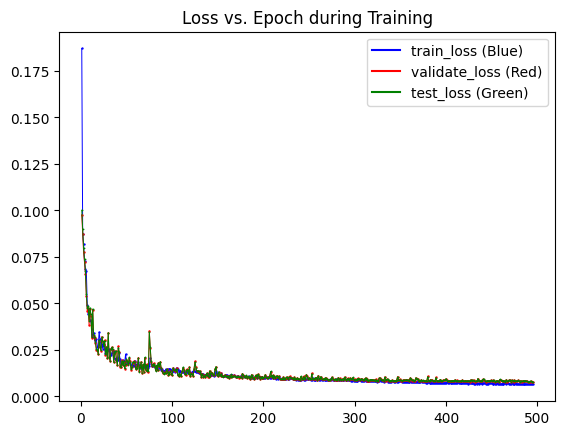

Epoch 495, train loss(MAE)=0.0066, valid loss(MAE)=0.0078, test loss(MAE)=0.0079, lr=0.00107374, best_test=0.0079
Epoch 496, train loss(MAE)=0.0065, valid loss(MAE)=0.0078, test loss(MAE)=0.008, lr=0.00107374, best_test=0.0079
Epoch 497, train loss(MAE)=0.0067, valid loss(MAE)=0.0083, test loss(MAE)=0.0084, lr=0.00107374, best_test=0.0079
Epoch 498, train loss(MAE)=0.0066, valid loss(MAE)=0.008, test loss(MAE)=0.0081, lr=0.00107374, best_test=0.0079
Epoch 499, train loss(MAE)=0.0064, valid loss(MAE)=0.0079, test loss(MAE)=0.0081, lr=0.00107374, best_test=0.0079
Epoch 500, train loss(MAE)=0.0064, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00107374, best_test=0.0079
Epoch 501, train loss(MAE)=0.0067, valid loss(MAE)=0.0086, test loss(MAE)=0.0087, lr=0.00107374, best_test=0.0079
Epoch 502, train loss(MAE)=0.0066, valid loss(MAE)=0.0082, test loss(MAE)=0.0083, lr=0.00107374, best_test=0.0079
Epoch 503, train loss(MAE)=0.0064, valid loss(MAE)=0.008, test loss(MAE)=0.008, lr=0.00107

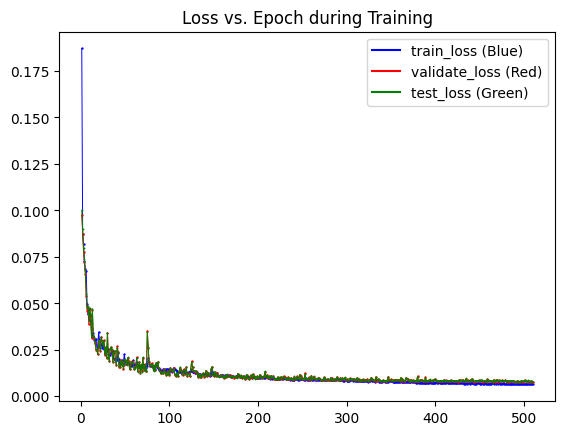

Epoch 510, train loss(MAE)=0.0064, valid loss(MAE)=0.0078, test loss(MAE)=0.008, lr=0.00107374, best_test=0.0079
Epoch 511, train loss(MAE)=0.0064, valid loss(MAE)=0.0078, test loss(MAE)=0.0079, lr=0.00107374, best_test=0.0079
Epoch 512, train loss(MAE)=0.0067, valid loss(MAE)=0.0081, test loss(MAE)=0.0081, lr=0.00107374, best_test=0.0079
Epoch 513, train loss(MAE)=0.0066, valid loss(MAE)=0.0081, test loss(MAE)=0.0082, lr=0.00107374, best_test=0.0079
Epoch 514, train loss(MAE)=0.0064, valid loss(MAE)=0.0077, test loss(MAE)=0.0078, lr=0.00107374, best_test=0.0078


KeyboardInterrupt: 

In [6]:
epoch_start = 0 if epoch is None else epoch
epoch = epoch_start
epochs = model_args["epochs"]

for epoch in range(epoch_start + 1, epochs + 1):

    model, train_loss = train_step(model, train_loader, train_dataset, optimizer, device)
    val_loss, _, _ = test_evaluations(model, val_loader, validation_dataset, device, ret_data=False)
    test_loss, _, _ = test_evaluations(model, test_loader, test_dataset, device, ret_data=False)

    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]["lr"]

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, split=15)

    # save best model
    if test_best_loss is None or test_loss < test_best_loss:
        test_best_loss = test_loss
        save_model_GCN(epoch, model, optimizer, scheduler, result_path)

    progress_msg = "Epoch " + str(epoch)
    progress_msg += ", train loss(MAE)=" + str(round(train_loss, 4))
    progress_msg += ", valid loss(MAE)=" + str(round(val_loss, 4))
    progress_msg += ", test loss(MAE)=" + str(round(test_loss, 4))
    progress_msg += ", lr=" + str(round(current_lr, 8))
    progress_msg += ", best_test=" + str(round(test_best_loss, 4))

    print(progress_msg)

Save model and checkpoint

In [7]:
checkpoint = torch.load(osp.join(result_path, "checkpoint.pt"),
                        map_location=get_device())

Show results

MAE loss of formation energy is:  0.07631808519363403


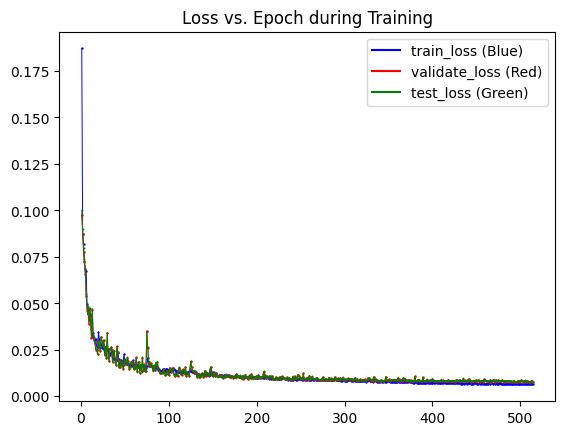

MAE=  0.07631809084462533


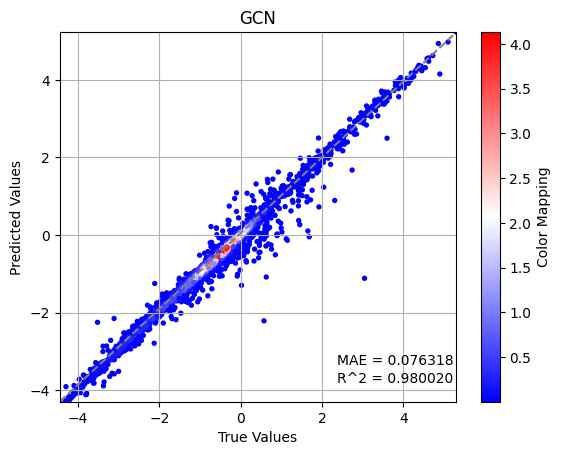

In [8]:
best_model = checkpoint["model"]

save_hyper_parameter(args, result_path)
save_train_progress(epoch - 1, train_losses, val_losses, test_losses, result_path)
test_loss, test_out, test_y = test_evaluations(best_model, test_loader, test_dataset, device, ret_data=True)

# Reverse normalization of test_out and y
min, max = get_data_scale(args)
test_y = reverse_min_max_scalar_1d(test_y, min, max)
test_out = reverse_min_max_scalar_1d(test_out, min, max)
loss = (test_out.squeeze() - test_y).abs().mean()
print("MAE loss of formation energy is: ", loss.item())

# save results
plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, res_path=result_path)
save_regression_result(test_out, test_y, result_path)
plot_regression_result("GCN", result_path, plotfilename="regression_figure.jpeg")